## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# Display the data table for preview
merged

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
total_mice_rows = merged["Mouse ID"].count()
total_mice_rows

1893

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupes = merged[merged.duplicated(['Mouse ID', 'Timepoint'])]
dupes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse = merged[merged.duplicated(['Mouse ID',])]
dupe_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned = merged.drop_duplicates("Mouse ID")
cleaned

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [7]:
# Checking the number of mice in the clean DataFrame.
new_total_mice = len(cleaned)
new_total_mice

249

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
sdev = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = merged.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

summary = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": sdev, "SEM": sem})
summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary
# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

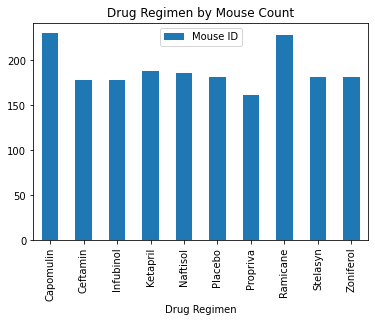

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_back = pd.DataFrame(merged.groupby(["Drug Regimen"]).count()).reset_index()
drug_bar = drug_back[["Drug Regimen", "Mouse ID"]].set_index("Drug Regimen")
drug_bar.plot(kind="bar")
plt.title("Drug Regimen by Mouse Count")
plt.show()

<BarContainer object of 10 artists>

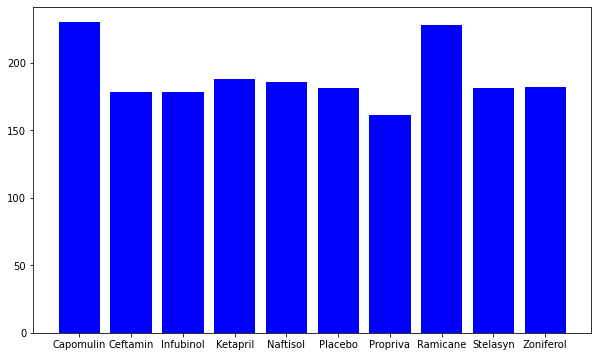

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = summary.index.tolist()

drug_count = (merged.groupby(["Drug Regimen"])["Age_months"].count()).tolist()
drug_count

plt.figure(figsize=(10,6))
plt.bar(x_axis, drug_count, color="b", align="center")


Text(0.5, 1.0, 'Percentage of Male and Female Mice')

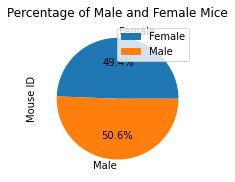

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = pd.DataFrame(merged.groupby(["Sex"]).count()).reset_index()
axis_1 = plt.subplot(121, aspect="equal")
gender.plot(kind="pie", y= "Mouse ID", ax = axis_1, labels=gender["Sex"], autopct='%1.1f%%')
plt.title("Percentage of Male and Female Mice")



([<matplotlib.patches.Wedge at 0x7fc2240a17f0>,
 [Text(0.020992503472585564, 1.0997996703027118, 'Females'),
  Text(-0.020992503472586185, -1.0997996703027118, 'Males')],
 [Text(0.011450456439592124, 0.5998907292560246, '49.4%'),
  Text(-0.011450456439592464, -0.5998907292560246, '50.6%')])

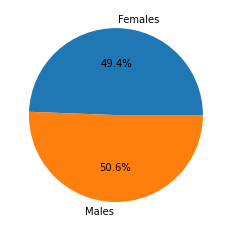

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_py = (merged.groupby(["Sex"])["Age_months"].count()).tolist()
gender_py
plt.pie(gender_py, labels = ["Females", "Males"], autopct = "%1.1f%%")


## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four = merged.sort_values(["Drug Regimen", "Mouse ID", "Timepoint"], ascending=True)
four_last = four.loc[four["Timepoint"] == 45]
C = four_last[four_last['Drug Regimen'].isin(['Capomulin'])]
R = four_last[four_last['Drug Regimen'].isin(['Ramicane'])]
I = four_last[four_last['Drug Regimen'].isin(['Infubinol'])]
Ce = four_last[four_last['Drug Regimen'].isin(['Ceftamin'])]
four_last.head().reset_index()

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
493,a275,Ceftamin,Female,20,28,45,62.999356,3
993,j296,Ceftamin,Female,24,30,45,61.849023,3
1033,k210,Ceftamin,Male,15,28,45,68.923185,3
1112,l471,Ceftamin,Female,7,28,45,67.748662,1
1132,l661,Ceftamin,Male,18,26,45,59.851956,3
1162,l733,Ceftamin,Female,4,30,45,64.299830,1
1260,o287,Ceftamin,Male,2,28,45,59.741901,4
1379,p438,Ceftamin,Female,11,26,45,61.433892,1
1670,w151,Ceftamin,Male,24,25,45,67.527482,3
1773,x581,Ceftamin,Female,19,28,45,64.634949,3


In [39]:
# Put treatments into a list for for loop (and later for plot labels)
C_tv = C.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
C_tv = C_tv["Tumor Volume (mm3)"]

R_tv = R.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
R_tv = R_tv["Tumor Volume (mm3)"]

I_tv = I.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
I_tv = I_tv["Tumor Volume (mm3)"]

Ce_tv = Ce.sort_values(["Tumor Volume (mm3)"], ascending=True).reset_index()
Ce_tv = Ce_tv["Tumor Volume (mm3)"]


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles_C_tv = C_tv.quantile([.25,.5,.75])
lowerq_C_tv = quartiles_C_tv[0.25]
upperq_C_tv = quartiles_C_tv[0.75]
iqr_C_tv = upperq_C_tv-lowerq_C_tv
print(f"For Capomulin, the median, lower quartile, upper quartile, and interquartile range are {quartiles_C_tv[0.5]}, {lowerq_C_tv}, {upperq_C_tv}, {iqr_C_tv}")

quartiles_R_tv = R_tv.quantile([.25,.5,.75])
lowerq_R_tv = quartiles_R_tv[0.25]
upperq_R_tv = quartiles_R_tv[0.75]
iqr_R_tv = upperq_R_tv-lowerq_R_tv
print(f"For Ramicane, the median, lower quartile, upper quartile, and interquartile range are {quartiles_R_tv[0.5]}, {lowerq_R_tv}, {upperq_R_tv}, {iqr_R_tv}")

quartiles_I_tv = I_tv.quantile([.25,.5,.75])
lowerq_I_tv = quartiles_I_tv[0.25]
upperq_I_tv = quartiles_I_tv[0.75]
iqr_I_tv = upperq_I_tv-lowerq_I_tv
print(f"For Infubinol, the median, lower quartile, upper quartile, and interquartile range are {quartiles_I_tv[0.5]}, {lowerq_I_tv}, {upperq_I_tv}, {iqr_I_tv}")

quartiles_Ce_tv = Ce_tv.quantile([.25,.5,.75])
lowerq_Ce_tv = quartiles_Ce_tv[0.25]
upperq_Ce_tv = quartiles_Ce_tv[0.75]
iqr_Ce_tv = upperq_Ce_tv-lowerq_Ce_tv
print(f"For Ceftamin, the median, lower quartile, upper quartile, and interquartile range are {quartiles_Ce_tv[0.5]}, {lowerq_Ce_tv}, {upperq_Ce_tv}, {iqr_Ce_tv}")

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
lowerbC = lowerq_C_tv - (1.5*iqr_C_tv)
upperbC = upperq_C_tv + (1.5*iqr_C_tv)

lowerbR = lowerq_R_tv - (1.5*iqr_R_tv)
upperbR = upperq_R_tv + (1.5*iqr_R_tv)

lowerbI = lowerq_I_tv - (1.5*iqr_I_tv)
upperbI = upperq_I_tv + (1.5*iqr_I_tv)

lowerbCe = lowerq_Ce_tv - (1.5*iqr_Ce_tv)
upperbCe = upperq_Ce_tv + (1.5*iqr_Ce_tv)

print(f"Values below {lowerbC} and values above {upperbC} could be outliers for Capomulin")
print(f"Values below {lowerbR} and values above {upperbR} could be outliers for Ramicane")
print(f"Values below {lowerbI} and values above {upperbI} could be outliers for Infubinol")
print(f"Values below {lowerbCe} and values above {upperbC} could be outliers for Ceftamin")

For Capomulin, the median, lower quartile, upper quartile, and interquartile range are 37.31184577, 32.37735684, 40.1592203, 7.781863460000004
For Ramicane, the median, lower quartile, upper quartile, and interquartile range are 34.848627300000004, 30.981175224999998, 38.508305307499995, 7.527130082499998
For Infubinol, the median, lower quartile, upper quartile, and interquartile range are 66.08306589, 62.75445141, 67.68556862, 4.9311172099999965
For Ceftamin, the median, lower quartile, upper quartile, and interquartile range are 64.29983003, 61.43389223, 67.52748237, 6.093590140000003
Values below 20.70456164999999 and values above 51.83201549 could be outliers for Capomulin
Values below 19.690480101250003 and values above 49.79900043124999 could be outliers for Ramicane
Values below 55.35777559500001 and values above 75.08224443499999 could be outliers for Infubinol
Values below 52.29350701999999 and values above 51.83201549 could be outliers for Ceftamin


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
